# Clustering Trials

In [1]:
import numpy as np
import pandas as pd
import random as rd
import seaborn as sns
import scipy.spatial as distance

from pyclustering.cluster import cluster_visualizer
import pyclustering.cluster.agglomerative as cl_agg

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from kmodes.kmodes import KModes
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering, Birch, DBSCAN
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

%matplotlib inline

In [2]:
rdata = np.random.rand(10,3)
rdata[rdata >= 0.5] = 1 
rdata[rdata < 0.5] = 0
rdata

array([[0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 1.],
       [0., 1., 0.],
       [1., 1., 1.],
       [1., 1., 0.],
       [0., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 0.]])

In [3]:
rd_df = pd.DataFrame(rdata, columns=['d1','d2','d3'])
rd_df

,d1,d2,d3
0,0.0,0.0,1.0
1,0.0,0.0,1.0
2,1.0,0.0,1.0
3,0.0,1.0,0.0
4,1.0,1.0,1.0
5,1.0,1.0,0.0
6,0.0,0.0,0.0
7,0.0,1.0,0.0
8,1.0,0.0,0.0
9,0.0,0.0,0.0


In [4]:
rd_df.describe().T

,count,mean,std,min,25%,50%,75%,max
d1,10.0,0.4,0.516398,0.0,0.0,0.0,1.0,1.0
d2,10.0,0.4,0.516398,0.0,0.0,0.0,1.0,1.0
d3,10.0,0.4,0.516398,0.0,0.0,0.0,1.0,1.0


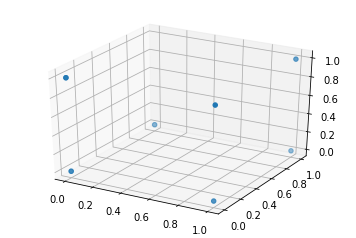

In [5]:
threedee = plt.figure().gca(projection='3d')
threedee.scatter(rd_df.d1, rd_df.d2, rd_df.d3, zdir='z', s=20, c=None, depthshade=True)

In [6]:
agg_cl = DBSCAN()
agg_cltrs = agg_cl.fit_predict(rdata)
agg_cl.labels_

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1])

In [7]:
km = KModes(n_clusters=3, init='Huang', n_init=5, verbose=1)
clusters = km.fit_predict(rdata)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 2, cost: 5.0
Run 1, iteration: 2/100, moves: 0, cost: 5.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 1, cost: 5.0
Run 2, iteration: 2/100, moves: 0, cost: 5.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 2, cost: 5.0
Run 3, iteration: 2/100, moves: 0, cost: 5.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 0, cost: 6.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 2, cost: 6.0
Run 5, iteration: 2/100, moves: 0, cost: 6.0
Best run was number 1


In [8]:
# Print labels
print(km.labels_)

[0 0 0 1 0 1 2 1 0 2]


In [9]:
tmp_labels = km.labels_.reshape(10,1).copy()
tmp_labels

array([[0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [2],
       [1],
       [0],
       [2]], dtype=uint8)

In [10]:
lbls_df = pd.DataFrame(tmp_labels,columns=['label'])

In [11]:
pd.concat([lbls_df, rd_df], axis=1)

,label,d1,d2,d3
0,0,0.0,0.0,1.0
1,0,0.0,0.0,1.0
2,0,1.0,0.0,1.0
3,1,0.0,1.0,0.0
4,0,1.0,1.0,1.0
5,1,1.0,1.0,0.0
6,2,0.0,0.0,0.0
7,1,0.0,1.0,0.0
8,0,1.0,0.0,0.0
9,2,0.0,0.0,0.0


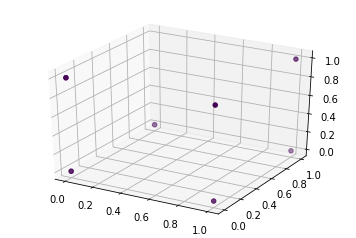

In [12]:
threedee = plt.figure().gca(projection='3d')
threedee.scatter(rd_df.d1, rd_df.d2, rd_df.d3, zdir='z', s=20, c=agg_cl.labels_, depthshade=True)

In [13]:
pca = PCA(n_components=3)
pca.fit(rd_df)

PCA(copy=True, iterated_power='auto', n_components=3, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [14]:
print(pca.components_)
print(pca.noise_variance_)
print(pca.explained_variance_)
print(pca.explained_variance_ratio_)  
print(pca.singular_values_)  

[[ 0.         -0.70710678  0.70710678]
 [ 0.8568901   0.36451293  0.36451293]
 [ 0.51549913 -0.6059128  -0.6059128 ]]
0.0
[0.33333333 0.30447916 0.16218751]
[0.41666667 0.38059895 0.20273439]
[1.73205081 1.6553889  1.20817531]


In [15]:
# ax = sns.heatmap(rdata, cmap ="YlGnBu", xticklabels = 10, yticklabels = 10)
# ax.tick_params(labelsize = 12)

# Template

## Data Understanding

In [26]:
docs_csv = pd.read_csv('./MOCK_DATA.csv', index_col=0)

In [33]:
docs_csv.shape

(1000, 6)

In [27]:
docs_csv.head()

,gender,postal_code,poisson,stocks,university,country
id,,,,,,
1,Male,49417 CEDEX,7,$106.49M,Institut National des Sciences Appliquées de R...,France
2,Female,75902 CEDEX 15,5,$5.24M,Ecole Supérieure d'Electronique de l'Ouest,France
3,Male,13456 CEDEX 13,3,$170.65M,Université de Perpignan,France
4,Female,92024 CEDEX,7,$50.64M,Ecole Nationale du Génie de l'Eau et de l'Envi...,France
5,Female,90009 CEDEX,4,$259.46M,Université de La Rochelle,France


In [31]:
docs_csv.gender.unique()

array(['Male', 'Female'], dtype=object)

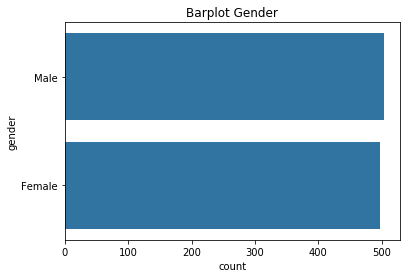

In [39]:
bh_gender = sns.countplot(y='gender', data=docs_csv, color='#1f77b4').set_title("Barplot Gender")

In [32]:
docs_csv.postal_code.nunique()

721

In [34]:
docs_csv.poisson.unique()

array([ 7,  5,  3,  4,  1,  9,  2,  6,  8, 11, 10,  0, 13, 12])

In [35]:
docs_csv.stocks.nunique()

739

In [37]:
docs_csv.university.nunique()

373

In [38]:
docs_csv.country.unique()

array(['France', 'Luxembourg', 'Netherlands', 'Germany', 'Switzerland',
       'Belgium'], dtype=object)

In [28]:
docs_csv.dtypes

gender         object
postal_code    object
poisson         int64
stocks         object
university     object
country        object
dtype: object

In [ ]:
docs_csv

In [30]:
docs_csv.describe().T

,count,mean,std,min,25%,50%,75%,max
poisson,1000.0,5.119,2.248086,0.0,4.0,5.0,7.0,13.0
